In [1]:
import ROOT

Welcome to JupyROOT 6.18/04


In [2]:
import math

In [6]:
canvas = ROOT.TCanvas()

## My function

In [7]:
a = -1
b = 1

In [113]:
def f(x, p):   
    return p[0]*(1/(1 + x[0]*x[0]) + 1 + x[0])

mypdf = ROOT.TF1('mypdf', f, a, b, 1)

In [118]:
mypdf.SetParameter(0, 1)

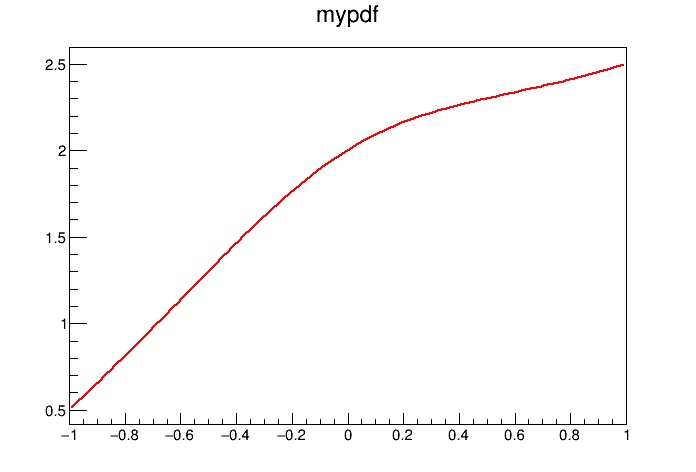

In [119]:
mypdf.Draw()
canvas.Draw()

## Neuman method

In [11]:
def generateNeuman(a, b):
    while True:
        
        M = mypdf(b)
        r = ROOT.gRandom.Uniform(a, b)
        mu = ROOT.gRandom.Uniform(0.0, M)
        
        if mu <= mypdf(r): 
            return r
        #raise 'Could never reach this point'
    

In [12]:
sw1 = ROOT.TStopwatch()

In [13]:
hist1 = ROOT.TH1F('hist1', 'Neuman method generated', 100, a, b)

In [14]:
sw1.Start()

for i in range(0, 100000):
    value = generateNeuman(a, b)
    hist1.Fill(value)
    
sw1.Stop()

##### Time:

In [15]:
print('time: ', end = '')
sw1.Print()

time: Real time 0:00:03, CP time 3.180


##### Plots: 

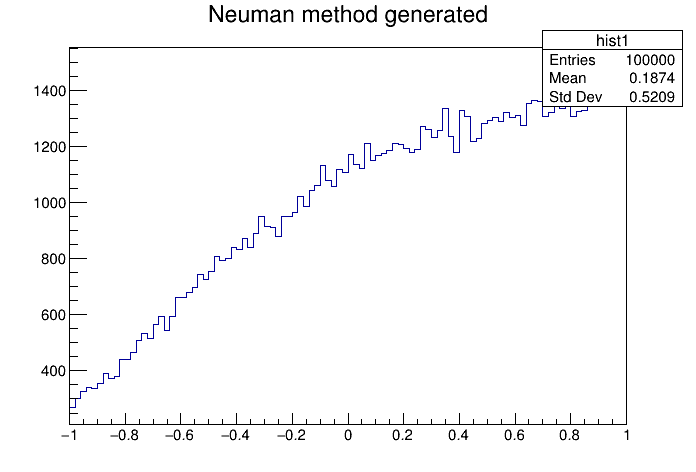

In [16]:
hist1.Draw()
canvas.Draw()

In [17]:
fit1 = hist1.Fit(mypdf, 'S')

 FCN=102.934 FROM MIGRAD    STATUS=CONVERGED      14 CALLS          15 TOTAL
                     EDM=1.89661e-13    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.59520e+02   1.77027e+00   8.81212e-03  -3.47909e-07


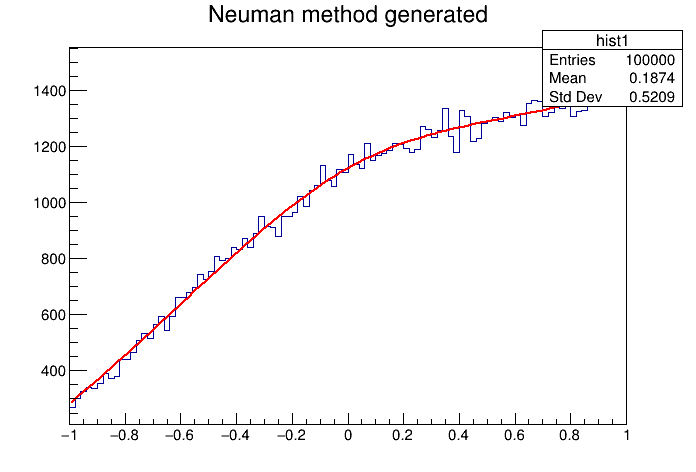

In [18]:
hist1.Draw()
canvas.Draw()

In [19]:
print('Fit parameter = ', fit1.Parameter(0))

Fit parameter =  559.5200096314647


#####  My mean and std dev

In [20]:
print('Mean = ', hist1.GetMean())
print('Std dev = ', hist1.GetStdDev())

Mean =  0.18737904329299462
Std dev =  0.5209194877094645


##### Values from table: 

- Mean: 0.18671 ± 0.016
- Std dev: 0.52161 ± 0.012

# Composition method

In [126]:
# 1/(1+x^2)
# integral: atan(x)

def fg1(x, p):   
    return p[0]/(1 + x[0]*x[0])

g1 = ROOT.TF1('g1', fg1, a, b, 1)

In [23]:
# 1 + x
# integral: 0.5*x^2 + x

def fg2(x, p):   
    return p[0]*(x[0]+1)

g2 = ROOT.TF1('g2', fg2, a, b, 1)

##### Define weights here:

In [130]:
beta1 = math.atan(b) - math.atan(a)
beta2 = (0.5*b*b + b) - (0.5*a*a + a)

print('beta1:', beta1, 'beta2:', beta2)

beta1: 1.5707963267948966 beta2: 2.0


In [132]:
g1.SetParameter(0, 1/beta1)
g2.SetParameter(0, 1/beta2)

In [134]:
alpha1 = beta1/(beta1 + beta2)
alpha2 = beta2/(beta1 + beta2)

print(alpha1 + alpha2)

1.0


##### Define generator: 

Distribution functions: 

- F1(t) = (atan(t) - atan(a))/beta1
- F2(t) = ((0.5t^2 + t) - (0.5a^2 + a))/beta2

Generated values: 

- t1 = tan(ybeta1 + atan(a))
- t2 = -1 + sqrt(1 + 2(ybeta2 + (0.5a^2 + a)))

In [135]:
def generateComposition(a, b):
    while True:
        
        u = ROOT.gRandom.Uniform(0.0, 1.0)
        y = ROOT.gRandom.Uniform(0.0, 1.0)
        
        if (u >= 0) and (u < alpha1):
            value = math.tan(y*beta1 + math.atan(a))
            return value
        
        elif (u >= alpha1) and (u <= alpha1 + alpha2):
            value = -1 + math.sqrt(1 + 2*(y*beta2 + (0.5*a*a + a)))
            return value
        
        else: pass #could never reach this point

##### Fill histogram:

In [136]:
hist2 = ROOT.TH1F('hist2', 'Composition method generated', 100, a, b)

Warning in <TROOT::Append>: Replacing existing TH1: hist2 (Potential memory leak).


In [137]:
sw2 = ROOT.TStopwatch()

sw2.Start()

for i in range(0, 100000):
    value = generateComposition(a, b)
    hist2.Fill(value)
    
sw2.Stop()

##### Time:

In [138]:
print('time: ', end = '')
sw2.Print()

time: Real time 0:00:01, CP time 1.640


##### Plots:

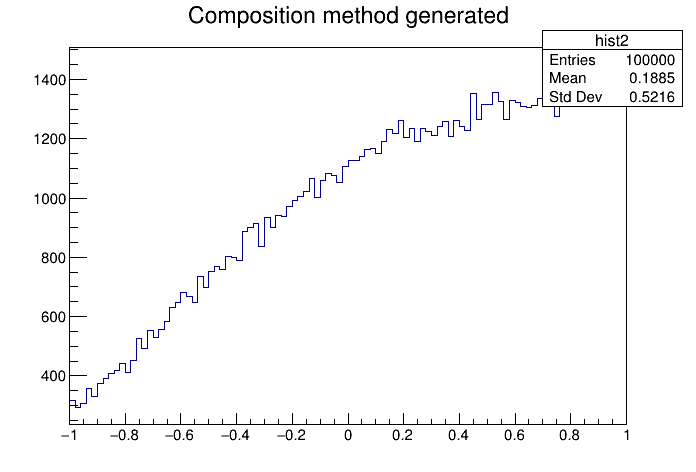

In [139]:
hist2.Draw()
canvas.Draw()

In [140]:
fit2 = hist2.Fit(mypdf, 'S')

 FCN=83.6744 FROM MIGRAD    STATUS=CONVERGED      12 CALLS          13 TOTAL
                     EDM=1.66588e-19    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.59628e+02   1.77044e+00   7.95476e-03   3.26029e-10


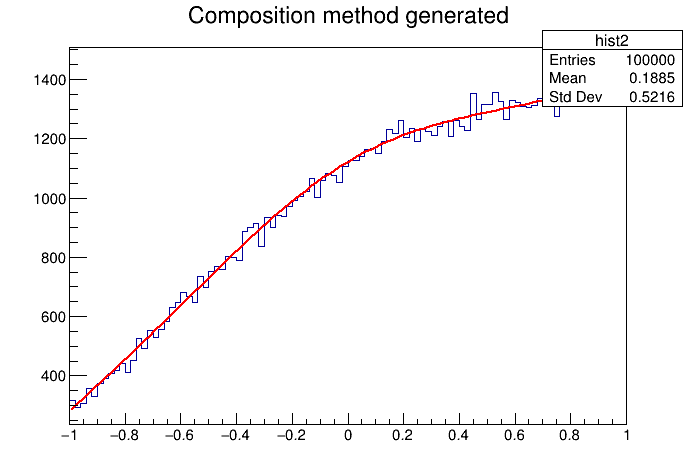

In [142]:
hist2.Draw()
canvas.Draw()

##### My mean and std dev

In [143]:
print('Mean = ', hist2.GetMean())
print('Std dev = ', hist2.GetStdDev())

Mean =  0.18852897250474385
Std dev =  0.5216361170069087


##### Values from table: 

- Mean: 0.18671 ± 0.016
- Std dev: 0.52161 ± 0.012

# TF1.GetRandom()

In [120]:
hist3 = ROOT.TH1F('hist3', 'GetRandom generated', 100, a, b)

In [121]:
sw3 = ROOT.TStopwatch()

sw3.Start()

for i in range(0, 100000):
    value = mypdf.GetRandom()
    hist3.Fill(value)
    
sw3.Stop()

##### Time:

In [122]:
print('time: ', end = '')
sw3.Print()

time: Real time 0:00:00, CP time 0.390


##### Plots:

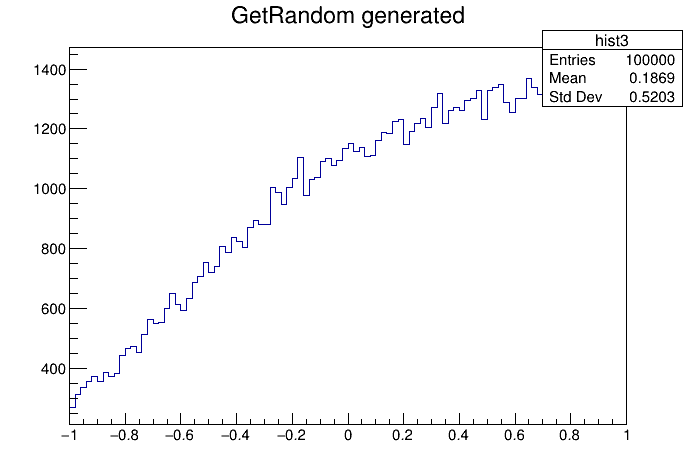

In [123]:
hist3.Draw()
canvas.Draw()

In [124]:
fit3 = hist3.Fit(mypdf,'S')

 FCN=110.255 FROM MIGRAD    STATUS=CONVERGED      14 CALLS          15 TOTAL
                     EDM=1.95022e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.59479e+02   1.77020e+00   9.11686e-03   1.11566e-06


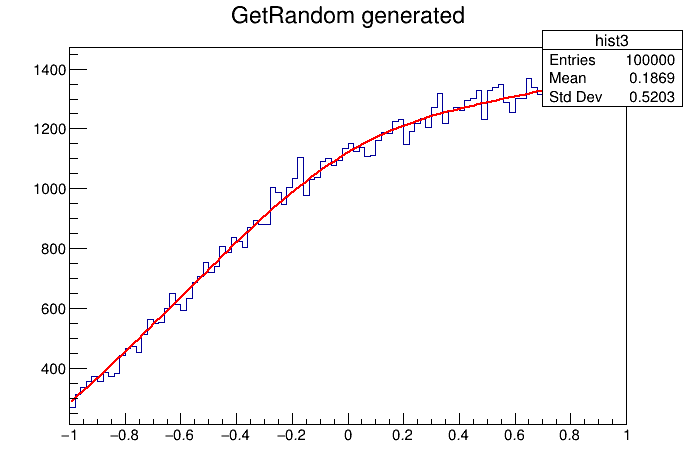

In [125]:
hist3.Draw()
canvas.Draw()